<a href="https://colab.research.google.com/github/TruongDuyLongPTIT/Experiment1/blob/main/GCN_Chord.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install deepdish==0.3.5
!pip install torch_geometric==1.4.3
!pip install torch_sparse
!pip install torch_scatter
!pip install torch_cluster

In [ ]:
!git clone https://github.com/harvardnlp/botnet-detection


In [ ]:
!cd botnet_detection
!python botnet_detection/setup.py install

In [ ]:
!cp -r /content/drive/MyDrive/botnet_chord.tar.gz /content/data/botnet/raw

In [ ]:
from botnet_detection.botdet.data.dataset_botnet import BotnetDataset
from botnet_detection.botdet.data.dataloader import GraphDataLoader

botnet_dataset_train = BotnetDataset(name='chord', split='train', graph_format='pyg')
botnet_dataset_val = BotnetDataset(name='chord', split='val', graph_format='pyg')
botnet_dataset_test = BotnetDataset(name='chord', split='test', graph_format='pyg')
print(botnet_dataset_train)

Extracting data/botnet/raw/botnet_chord.tar.gz
Processing...
writing train set ----------


768it [02:28,  5.19it/s]


train split --- number of graphs: 768, data saved at data/botnet/processed/chord_train.hdf5.
writing val set ----------


96it [00:19,  4.90it/s]


val split --- number of graphs: 96, data saved at data/botnet/processed/chord_val.hdf5.
writing test set ----------


96it [00:20,  4.77it/s]


test split --- number of graphs: 96, data saved at data/botnet/processed/chord_test.hdf5.
Done!
BotnetDataset(topology: chord | split: train | #graphs: 768 | graph format: pyg)


In [ ]:
!bash /content/botnet_detection/run_botnet.sh

All Logs will be saved to ./saved_models/chord_model_lay12_rh1_rw_ep50.log
python /content/botnet_detection/train_botnet.py --devid 0 --data_dir ./data/botnet --data_name chord --batch_size 16 --enc_sizes 32 32 32 32 32 32 32 32 32 32 32 32 --act relu --residual_hop 1 --deg_norm rw --final proj --epochs 50 --lr 0.005 --early_stop 1 --save_dir ./saved_models --save_name chord_model_lay12_rh1_rw_ep50.pt
------------------------------
Namespace(act='relu', aggr='add', att_act='lrelu', att_combine='cat', att_combine_out='cat', att_dir='in', att_dropout=0, batch_size=16, bias=True, data_dir='./data/botnet', data_name='chord', deg_norm='rw', devid=0, dropout=0.0, early_stop=1, edge_gate='none', enc_sizes=[32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32], epochs=50, final='proj', in_channels=1, in_memory=False, layer_act='none', log_interval=96, logmode='w', lr=0.005, n_classes=2, nheads=[1], nodemodel='additive', residual_hop=1, save_dir='./saved_models', save_name='chord_model_lay12_rh1_rw_e

In [ ]:
file = open("/content/measure_perform.txt", "r+")
result = file.read()

In [ ]:
import json
dict_measure = json.loads(result)
print(type(dict_measure))
print(dict_measure)

<class 'dict'>
{'rec': [0.0, 8.22916666666667e-05, 0.040322916666666674, 0.5259677083333334, 0.9156020833333333, 0.9137510416666667, 0.9590395833333333, 0.9711687499999999, 0.9672822916666668, 0.9878166666666665, 0.9797947916666664, 0.979921875, 0.9803458333333336, 0.9806677083333332, 0.981069791666667, 0.9664739583333336, 0.9854031250000004, 0.9807135416666664, 0.9812635416666672, 0.9813562500000002, 0.9814416666666661, 0.9814906250000003, 0.9815572916666665, 0.9816291666666664, 0.9816593749999999, 0.9816375000000003, 0.9817218750000003, 0.9818447916666667, 0.9818583333333333, 0.9818812500000001, 0.9819947916666666, 0.9820395833333334, 0.9820802083333332, 0.9821468749999994, 0.9820916666666663, 0.9820989583333332, 0.9819770833333333, 0.9820468749999999, 0.9820916666666667, 0.9821572916666663, 0.9821916666666666, 0.9823281249999999, 0.9823875000000001, 0.9823604166666664, 0.9825125, 0.9822270833333332, 0.9823333333333331, 0.9825885416666668, 0.9824729166666669, 0.9821093750000002], 'f1

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

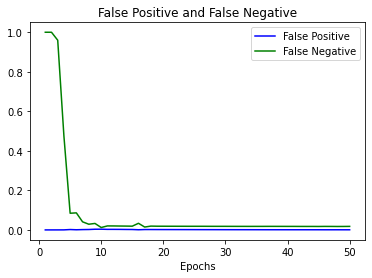

In [ ]:
epochs = range(1, 51)
# False Positive and False Negative
plt.xlabel('Epochs')
plt.title('False Positive and False Negative')
plt.plot(epochs, dict_measure['fpr'], 'b', label='False Positive')
plt.plot(epochs, dict_measure['fnr'], 'g', label='False Negative')
plt.legend(loc='best')
plt.show()

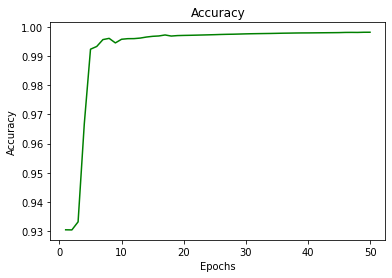

In [ ]:
# Accuracy
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.plot(epochs, dict_measure['acc'], 'g', label='Accuracy')
plt.show()


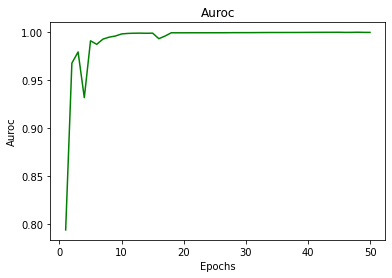

In [ ]:
# Auroc
plt.xlabel('Epochs')
plt.ylabel('Auroc')
plt.title('Auroc')
plt.plot(epochs, dict_measure['auroc'], 'g', label='Auroc')
plt.show()

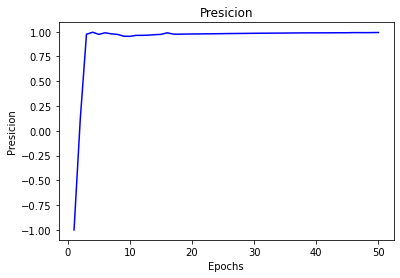

In [ ]:
# Precision
plt.xlabel('Epochs')
plt.ylabel('Presicion')
plt.title('Presicion')
plt.plot(epochs, dict_measure['prc'], 'b', label='Precision')
plt.show()


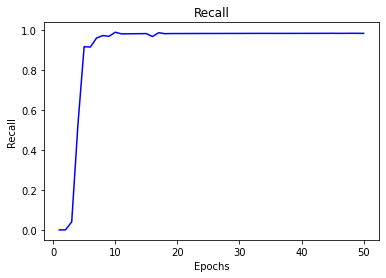

In [ ]:
# Recall
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.title('Recall')
plt.plot(epochs, dict_measure['rec'], 'b', label='Recall')
plt.show()

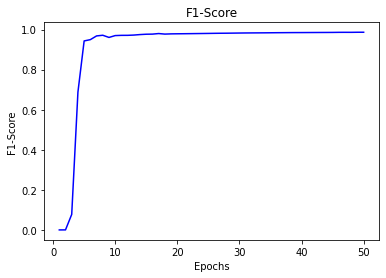

In [ ]:
# F1 score
plt.xlabel('Epochs')
plt.ylabel('F1-Score')
plt.title('F1-Score')
plt.plot(epochs, dict_measure['f1'], 'b', label='F1-Score')
plt.show()